# Draft

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import datetime as dt

from typing import List

jtplot.style(figsize=(15, 9))

<AxesSubplot:xlabel='Datetime'>

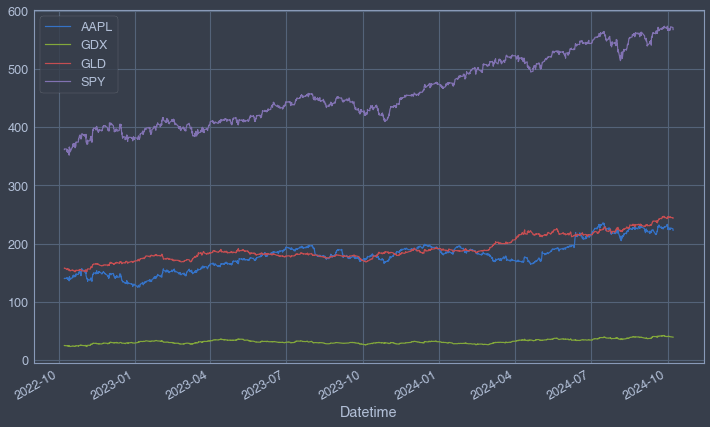

In [12]:
df = pd.read_csv('../../data/bt/gld_gdx_aapl_spy__1H.csv', parse_dates=True, header=[0, 1], index_col=0)
df['Close'].plot()

In [18]:
data = df['Close']['AAPL'].to_frame()
data.rename(columns={'AAPL': 'price'}, inplace=True)

In [19]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))
data['position'] = np.sign(data['returns'])
data['strategy'] = data['position'].shift(1) * data['returns']

<AxesSubplot:xlabel='Datetime'>

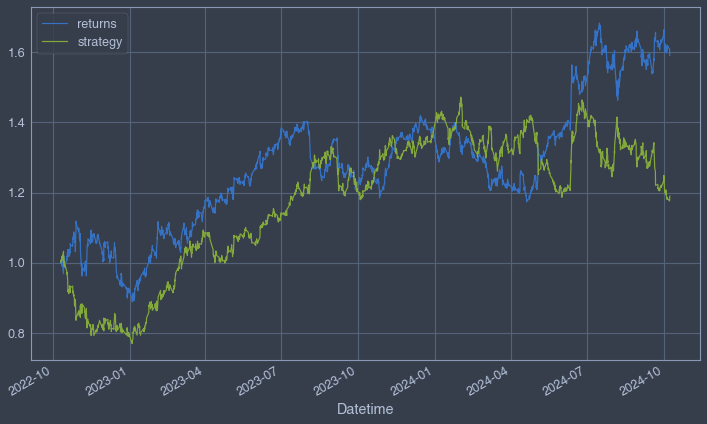

In [20]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot()

<AxesSubplot:xlabel='Datetime'>

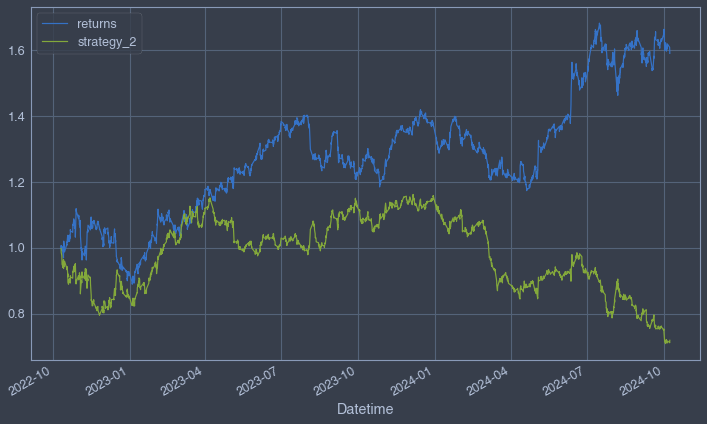

In [21]:
data['position_2'] = np.sign(data['returns'].rolling(3).mean())
data['strategy_2'] = data['position_2'].shift(1) * data['returns']

data[['returns', 'strategy_2']].dropna().cumsum().apply(np.exp).plot()

<AxesSubplot:xlabel='Datetime'>

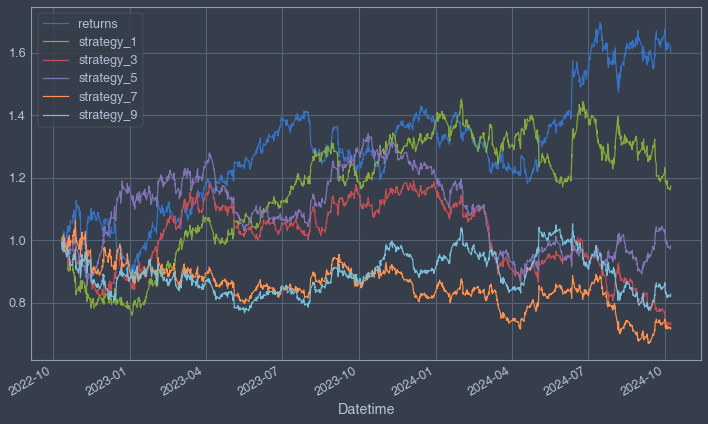

In [23]:
to_plot = ['returns']
for m in [1, 3, 5, 7, 9]:
    data[f'position_{m}'] = np.sign(data['returns'].rolling(m).mean())
    data[f'strategy_{m}'] = data[f'position_{m}'].shift(1) * data['returns']
    to_plot.append(f'strategy_{m}')

data[to_plot].dropna().cumsum().apply(np.exp).plot()

<AxesSubplot:xlabel='Datetime'>

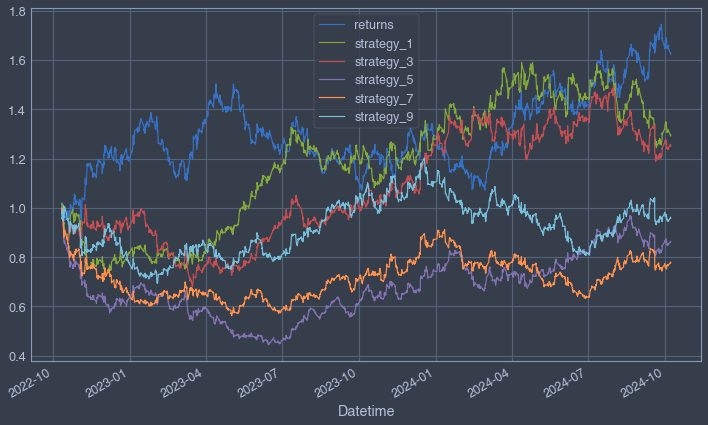

In [25]:
data = df['Close']['GDX'].to_frame()
data.rename(columns={'GDX': 'price'}, inplace=True)
data['returns'] = np.log(data['price'] / data['price'].shift(1))

to_plot = ['returns']
for m in [1, 3, 5, 7, 9]:
    data[f'position_{m}'] = np.sign(data['returns'].rolling(m).mean())
    data[f'strategy_{m}'] = data[f'position_{m}'].shift(1) * data['returns']
    to_plot.append(f'strategy_{m}')

data[to_plot].dropna().cumsum().apply(np.exp).plot()